# Importing Modules

In [107]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]=(16, 9)

In [108]:
import warnings
warnings.simplefilter(action="ignore")

# Loading Data

In [109]:
df = pd.read_csv("LoanStats3a.csv", parse_dates=["last_pymnt_d", "last_credit_pull_d", "issue_d", "earliest_cr_line"])

In [110]:
df.shape

(42538, 145)

# Data Preprocessing

In [111]:
# Dropping columns in which 50% values are missing
def get_empty_columns(dataset, missing_threshold=80):
    empty_columns = []
    for i in dataset.columns:
        if((df[i].isnull().sum()/dataset.shape[0])*100 > missing_threshold):
            empty_columns.append(i)
    return empty_columns

empty_col = get_empty_columns(df, 70)
df.drop(empty_col, axis=1, inplace=True)

In [112]:
df.shape

(42538, 55)

In [113]:
# Dropping Date Columns
def get_date_columns(dataset):
    date_col = []
    for col in dataset:
        if (dataset[col].dtype == "datetime64[ns]"):
            date_col.append(col)
            
    return date_col

date_columns = get_date_columns(df)
df.drop(date_columns, axis=1, inplace=True)

In [114]:
# Dropping rows missing 50% data
df.dropna(thresh=25, axis=0, inplace=True)

In [115]:
# Dropping String data like Job Title and Description column
df.drop(["emp_title", "desc", "title"], axis=1, inplace=True)

In [116]:
# Filling Job Experience Column
df.emp_length.fillna(value="10+ year", inplace=True)

In [117]:
# Converting types to float and filling missing values
df.int_rate = df.int_rate.str.replace("%", "").astype("float64")
df.revol_util = df.revol_util.str.replace("%", "").astype("float64")
df.revol_util.fillna(value=df.revol_util.mean(), inplace=True)

In [118]:
# Dropping Constant Columns
constant_col = ["acc_now_delinq", "delinq_amnt", "zip_code", "initial_list_status", "out_prncp", "out_prncp_inv", "pub_rec_bankruptcies", "tax_liens", "disbursement_method", "policy_code", "application_type", "collections_12_mths_ex_med", "chargeoff_within_12_mths", "pymnt_plan", "hardship_flag"]
df.drop(constant_col, axis=1, inplace=True)

In [119]:
# Removing outlier from Annual Income Column
index = df[(df.annual_inc > 200000)].index
df.drop(index, axis=0, inplace=True)

In [120]:
# Filling NAN values Annual Income Column
df.annual_inc.fillna(value=30000, inplace=True)

In [121]:
# Dropping NAN values
df.dropna(inplace=True)

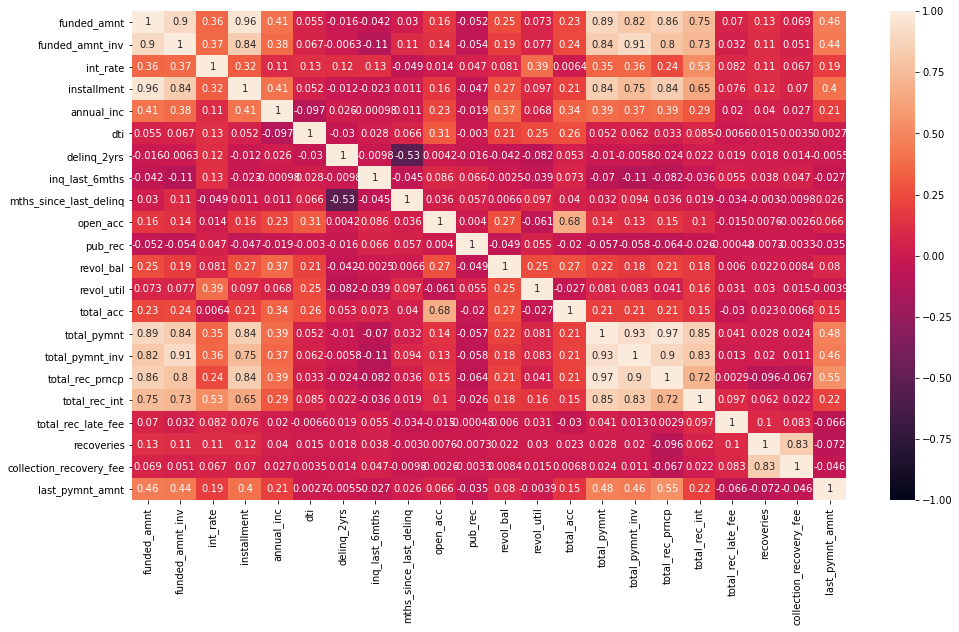

In [128]:
sns.heatmap(df.drop("loan_amnt", axis=1).corr(), vmin=-1, vmax=1, annot=True)

In [135]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

labeled_df = pd.DataFrame()
for col in df:
    if(df[col].dtype == "object"):
        labeled_df[col] = encoder.fit_transform(df[col])
    else:
        labeled_df[col] = df[col]



In [136]:
x = labeled_df.drop("loan_amnt", axis=1)
y = labeled_df["loan_amnt"]

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Model

In [138]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
lin_model.score(x_test, y_test)

0.9681848257679303

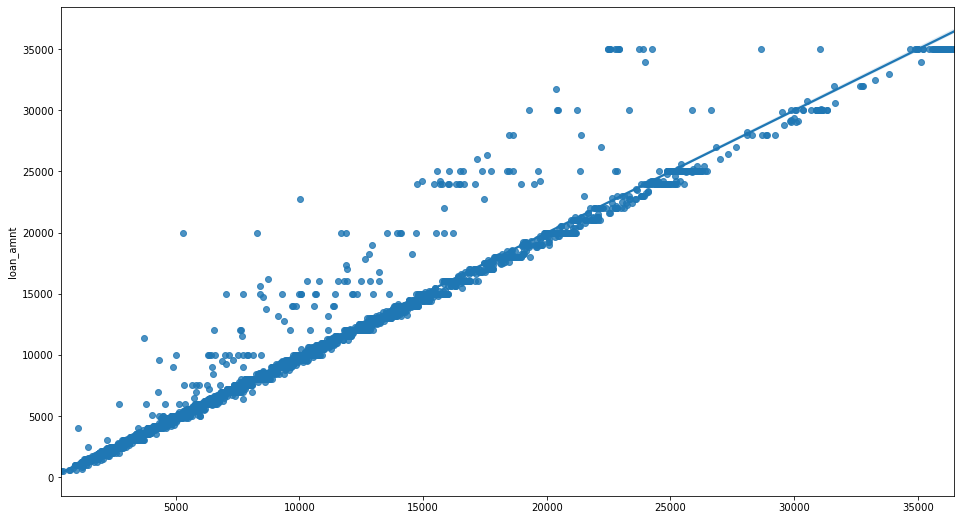

In [140]:
sns.regplot(lin_model.predict(x_test), y_test)
plt.show()

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [143]:
cross_val_score(KNeighborsRegressor(), x, y)

array([0.95296641, 0.93254023, 0.92990011, 0.94622147, 0.72536674])

In [144]:
cross_val_score(SVR(), x, y)

array([-0.03787138,  0.06722049,  0.10483479,  0.13616826,  0.13510789])